In [ ]:
!pip install -q youtube-transcript-api
!pip install -q google-api-python-client
api_key=# enter your own key

In [ ]:
# Necessary Libraries
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi # Library for transcripts.

In [ ]:
# Function to get video data from a playlist.
def get_data(playlistId):
  videos=[]
  next_page_token = None
  while 1: #Always True
      res = youtube.playlistItems().list(playlistId=playlistId,
                                          part='snippet',
                                          maxResults=50,
                                          pageToken=next_page_token).execute()
      videos += res['items']
      next_page_token = res.get('nextPageToken')

      if next_page_token is None:
          break
  return videos

This is how the response looks -
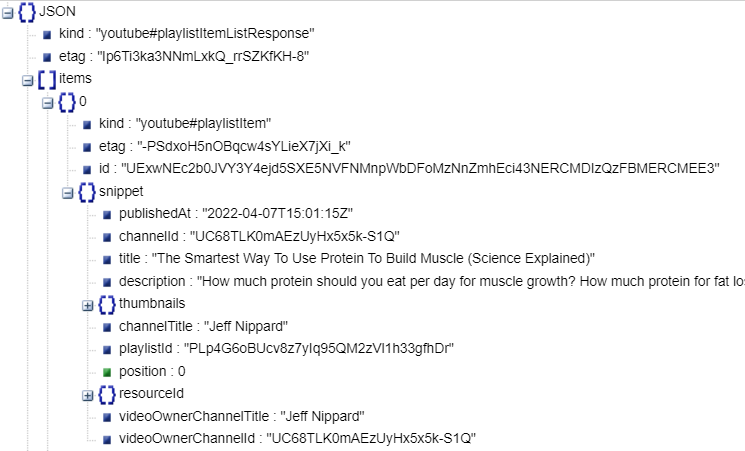

In [ ]:
# Getting the data
youtube = build('youtube', 'v3',developerKey=api_key)
ids=['PLp4G6oBUcv8z7yIq95QM2zVl1h33gfhDr','PLRS2DE4P39EdizI8E40SndxWZKBVONMFP','PLNAZHiu0ASAryHzC8k6HP9hH-yxNfY3UW'] # list of playlistid
allvideos=[]
for id in ids:
  allvideos.append(get_data(id))
influencer_data={
    'name':[],
   'videoId':[],
   'title':[],
   'date':[],
   'transcripts':[],
   'length':[]
} # Dictionary to save the data.
for videos in allvideos:
  for video in videos:
    id=video['snippet']['resourceId']['videoId']
    influencer_data['name'].append(video['snippet']['channelTitle'])
    influencer_data['videoId'].append(id)
    influencer_data['title'].append(video['snippet']['title'])
    influencer_data['date'].append(video['snippet']['publishedAt'])
    text=[]
    request = youtube.videos().list(
        part="contentDetails",
        id=id
    ).execute()
    if  request['items']!=[]: # if duration is not empty.
      dur = isodate.parse_duration(request['items'][0]['contentDetails']['duration'])
      influencer_data['length'].append(float(round(dur.total_seconds()/60,2)))
    else:
      influencer_data['length'].append([]) # if duration is empty then append an empty list.
    
    try:
      responses = YouTubeTranscriptApi.get_transcript(
          id, languages=['en'])
      for response in responses:
          text.append(response['text'])        
    except Exception as e:
      print(e)
    influencer_data['transcripts'].append(text)

In [ ]:
# Save to data.csv file.
df = pd.DataFrame.from_dict(influencer_data)
df.to_csv("data_with_duration.csv")